<a href="https://colab.research.google.com/github/Jesteban247/Data-Processing/blob/main/Project/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Install PySpark**

In [ ]:
!sudo apt update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
#Check this site for the latest download link https://www.apache.org/dyn/closer.lua/spark/spark-3.2.1/spark-3.2.1-bin-hadoop3.2.tgz
!wget -q https://dlcdn.apache.org/spark/spark-3.2.1/spark-3.2.1-bin-hadoop3.2.tgz
!tar xf spark-3.2.1-bin-hadoop3.2.tgz
!pip install -q findspark
!pip install pyspark
!pip install py4j

import os
import sys
# os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
# os.environ["SPARK_HOME"] = "/content/spark-3.2.1-bin-hadoop3.2"


import findspark
findspark.init()
findspark.find()

import pyspark

from pyspark.sql import DataFrame, SparkSession
from typing import List
import pyspark.sql.types as T
import pyspark.sql.functions as F

spark= SparkSession \
       .builder \
       .appName("Final_Project") \
       .getOrCreate()

spark

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [736 kB]
Hit:8 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Get:9 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [1,954 kB]
Hit:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,349 kB]
Hit:12 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:13 http://securit

# **Other Libraries**

In [ ]:
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd

from bs4 import BeautifulSoup
from pyspark.sql.functions import col, isnan, when, count, regexp_replace

#Bonus
from pyspark.sql.functions import monotonically_increasing_id

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# **Import Data**

The data can be downloaded from GitHub, remember to change the path to use it.

In [ ]:
# Convert to a df
Arrest_df = spark.read.csv("/content/drive/MyDrive/Data Processing/Data/Arrest.csv", header=True, inferSchema=True)
Collisions_df= spark.read.csv("/content/drive/MyDrive/Data Processing/Data/Collisions.csv", header=True, inferSchema=True)
Education_df = spark.read.csv("/content/drive/MyDrive/Data Processing/Data/Education.csv", header=True, inferSchema=True)
Poverty_df= spark.read.csv("/content/drive/MyDrive/Data Processing/Data/Poverty.csv", header=True, inferSchema=True)

# **Exploratory Analisis**

## Arrests

This is a breakdown of every arrest effected in NYC by the NYPD during the current year.
This data is manually extracted every quarter and reviewed by the Office of Management Analysis and Planning.
Each record represents an arrest effected in NYC by the NYPD and includes information about the type of crime, the location and time of enforcement.

### Overview





In [ ]:
# Df
Arrest_df.show()

In [ ]:
# Show the schema
Arrest_df.printSchema()

In [ ]:
# Display summary statistics
Arrest_df.describe().show()

In [ ]:
# Count the number of rows in the DataFrame
row_count = Arrest_df.count()
print("Total number of rows:", row_count)

# Show the number of columns
col_count = len(Arrest_df.columns)
print("Total number of columns:", col_count)

### Plots by category

In [ ]:
# Aggregating data for visualization in Spark
offense_counts = Arrest_df.groupBy("OFNS_DESC").count()

# Finding top 5 offenses
top_offenses = offense_counts.orderBy(offense_counts["count"].desc()).limit(5)

# Convert to Pandas for visualization
top_offenses_df = top_offenses.toPandas()

# Plotting the distribution of arrests by offense description horizontally
plt.figure(figsize=(8, 6))
plt.barh(top_offenses_df["OFNS_DESC"], top_offenses_df["count"], color='skyblue')
plt.xlabel("Number of Arrests")
plt.ylabel("Offense Description")
plt.title("Top 5 Offenses by Number of Arrests")
plt.gca().invert_yaxis()  # Invert y-axis to have the highest count at the top
plt.show()

In [ ]:
# Group the data by perpetrator sex and count the arrests
arrests_by_sex = Arrest_df.groupBy("PERP_SEX").count()

# Convert the data to a Pandas DataFrame
arrests_by_sex_df = arrests_by_sex.toPandas()

# Assigning colors to each sex
colors = ['pink', 'blue', 'grey']

# Create a bar chart of the arrests by sex with different colors for each sex
plt.bar(arrests_by_sex_df["PERP_SEX"], arrests_by_sex_df["count"], color=colors)
plt.xlabel("Sex")
plt.ylabel("Number of Arrests")
plt.title("Arrests by Perpetrator Sex")
plt.show()

In [ ]:
# Group the data by race and count the arrests
arrests_by_race = Arrest_df.groupBy("PERP_RACE").count()

# Find the top 5 races
top_races = arrests_by_race.orderBy(arrests_by_race["count"].desc()).limit(5)

# Convert the data to a Pandas DataFrame
top_races_df = top_races.toPandas()

# Create a horizontal bar chart of the arrests by race
plt.barh(top_races_df["PERP_RACE"], top_races_df["count"], color='skyblue')
plt.ylabel("Race")
plt.xlabel("Number of Arrests")
plt.title("Top 5 Races by Number of Arrests")
plt.show()

In [ ]:
# Group the data by borough and count the arrests
arrests_by_borough = Arrest_df.groupBy("ARREST_BORO").count()

# Convert the data to a Pandas DataFrame
arrests_by_borough_df = arrests_by_borough.toPandas()

# Create a bar chart of the arrests by borough with different colors for each bar
colors = plt.cm.tab10(range(len(arrests_by_borough_df)))
plt.bar(arrests_by_borough_df["ARREST_BORO"], arrests_by_borough_df["count"], color=colors)
plt.xlabel("Borough")
plt.ylabel("Number of Arrests")
plt.title("Arrests by Borough")
plt.show()


In [ ]:
# Group the data by age group and count the arrests
arrests_by_age_group = Arrest_df.groupBy("AGE_GROUP").count()

# Convert the data to a Pandas DataFrame
arrests_by_age_group_df = arrests_by_age_group.toPandas()

# Create a bar chart of the arrests by age group with different colors for each bar
colors = plt.cm.tab10(range(len(arrests_by_age_group_df)))
plt.bar(arrests_by_age_group_df["AGE_GROUP"], arrests_by_age_group_df["count"], color=colors)
plt.xlabel("Age Group")
plt.ylabel("Number of Arrests")
plt.title("Arrests by Age Group")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

### Plots with relationships

In [ ]:
# Group the data by age group and perpetrator race, and count the arrests
arrests_by_age_race = Arrest_df.groupBy("AGE_GROUP", "PERP_RACE").count()

# Find the top 3 racial categories
top_races = arrests_by_age_race.groupBy("PERP_RACE").sum("count").orderBy("sum(count)", ascending=False).limit(3).select("PERP_RACE")

# Filter the data for the top 3 racial categories
arrests_by_age_race_filtered = arrests_by_age_race.join(top_races, "PERP_RACE")

# Convert the data to a Pandas DataFrame
arrests_by_age_race_df = arrests_by_age_race_filtered.toPandas()

# Plotting using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='PERP_RACE', y='count', hue='AGE_GROUP', data=arrests_by_age_race_df, palette="colorblind")
plt.xlabel("Perpetrator Race")
plt.ylabel("Number of Arrests")
plt.title("Arrests by Perpetrator Race and Age Group (Top 3)")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Age Group')
plt.show()

### Time lapse

In [ ]:
# Extract month-year from ARREST_DATE
Arrest_df = Arrest_df.withColumn("MonthYear", F.date_format(F.to_date("ARREST_DATE", "MM/dd/yyyy"), "yyyy-MM"))

# Group the data by month-year and count the arrests
arrests_over_time = Arrest_df.groupBy("MonthYear").count().orderBy("MonthYear")

# Convert the data to a Pandas DataFrame
arrests_over_time_df = arrests_over_time.toPandas()

# Plotting the distribution of arrests over time using plotly
fig = px.line(arrests_over_time_df, x='MonthYear', y='count', title='Distribution of Arrests Over Time')
fig.update_xaxes(title_text='Month-Year')
fig.update_yaxes(title_text='Number of Arrests')
fig.show()

### Map

In [ ]:
# Convert the latitude and longitude data to Pandas DataFrame
latitude_longitude_df = Arrest_df.select("Latitude", "Longitude").toPandas()

# Plotting latitude and longitude data on an interactive map using plotly
fig = px.scatter_mapbox(latitude_longitude_df, lat="Latitude", lon="Longitude",
                        title="Arrest Locations",
                        zoom=10)  # Adjust the zoom level as needed
fig.update_layout(mapbox_style="open-street-map")
fig.show()


## Collisions

The Motor Vehicle Collisions vehicle table contains details on each vehicle involved in the crash. Each row represents a motor vehicle involved in a crash. The data in this table goes back to April 2016 when crash reporting switched to an electronic system.

### Overview

In [ ]:
# Df
Collisions_df.show()

In [ ]:
# Show the schema
Collisions_df.printSchema()

In [ ]:
# Display summary statistics
Collisions_df.describe().show()

In [ ]:
# Count the number of rows in the DataFrame
row_count = Collisions_df.count()
print("Total number of rows:", row_count)

# Show the number of columns
col_count = len(Collisions_df.columns)
print("Total number of columns:", col_count)

### Plots

In [ ]:
# Extract month-year from CRASH_DATE
Collisions_df = Collisions_df.withColumn("MonthYear", F.date_format(F.to_date("CRASH_DATE", "MM/dd/yyyy"), "yyyy-MM"))

# Group the data by month-year and count the crashes from vehicles
crashes_over_time = Collisions_df.groupBy("MonthYear").count().orderBy("MonthYear")

# Convert the data to a Pandas DataFrame
crashes_over_time_df = crashes_over_time.toPandas()

# Plotting the distribution of crashes over time using plotly
fig = px.line(crashes_over_time_df, x='MonthYear', y='count', title='Distribution of Crashes from Vehicles Over Time')
fig.update_xaxes(title_text='Month-Year')
fig.update_yaxes(title_text='Number of Crashes')
fig.show()

In [ ]:
# Extract hour from CRASH_TIME
Collisions_df = Collisions_df.withColumn("Hour", F.hour("CRASH_TIME"))

# Group the data by hour and count the crashes
crashes_by_hour = Collisions_df.groupBy("Hour").count().orderBy("Hour")

# Convert the data to a Pandas DataFrame
crashes_by_hour_df = crashes_by_hour.toPandas()

# Plotting the distribution of crashes by hour using plotly
fig = px.bar(crashes_by_hour_df, x='Hour', y='count', title='Distribution of Crashes by Hour')
fig.update_xaxes(title_text='Hour of Day (24-hour format)')
fig.update_yaxes(title_text='Number of Crashes')
fig.show()

In [ ]:
# Group the data by vehicle type and count the crashes
crashes_by_vehicle_type = Collisions_df.groupBy("VEHICLE_TYPE").count()

# Get the top 5 vehicle types with the most crashes
top_5_vehicle_types = crashes_by_vehicle_type.orderBy(F.desc("count")).limit(5)

# Convert the data to a Pandas DataFrame
top_5_vehicle_types_df = top_5_vehicle_types.toPandas()

# Plotting the distribution of crashes by top 5 vehicle types using plotly
fig = px.bar(top_5_vehicle_types_df, x='VEHICLE_TYPE', y='count', title='Distribution of Crashes by Top 5 Vehicle Types')
fig.update_xaxes(title_text='Vehicle Type')
fig.update_yaxes(title_text='Number of Crashes')
fig.show()

In [ ]:
# Replace null values in PRE_CRASH with a placeholder (e.g., "Unknown")
Collisions_df = Collisions_df.fillna({'PRE_CRASH': 'Unknown'})

# Group the data by PRE_CRASH and count the crashes
crashes_by_pre_crash = Collisions_df.groupBy("PRE_CRASH").count()

# Get the top 5 pre-crash factors with the most crashes
top_5_pre_crash = crashes_by_pre_crash.orderBy(F.desc("count")).limit(5)

# Convert the data to a Pandas DataFrame
top_5_pre_crash_df = top_5_pre_crash.toPandas()

# Plotting the distribution of crashes by top 5 pre-crash factors using plotly
fig = px.bar(top_5_pre_crash_df, x='PRE_CRASH', y='count', title='Distribution of Crashes by Top 5 Pre-Crash Factors',
             color='PRE_CRASH', color_discrete_sequence=px.colors.qualitative.Set1)
fig.update_xaxes(title_text='Pre-Crash Factor')
fig.update_yaxes(title_text='Number of Crashes')
fig.show()

In [ ]:
# Replace null values in POINT_OF_IMPACT with a placeholder (e.g., "Unknown")
Collisions_df = Collisions_df.fillna({'POINT_OF_IMPACT': 'Unknown'})

# Group the data by POINT_OF_IMPACT and count the crashes
crashes_by_point_of_impact = Collisions_df.groupBy("POINT_OF_IMPACT").count()

# Get the top 5 point of impact factors with the most crashes
top_5_point_of_impact = crashes_by_point_of_impact.orderBy(F.desc("count")).limit(5)

# Convert the data to a Pandas DataFrame
top_5_point_of_impact_df = top_5_point_of_impact.toPandas()

# Plotting the distribution of crashes by top 5 point of impact factors using plotly
fig = px.bar(top_5_point_of_impact_df, x='POINT_OF_IMPACT', y='count', title='Distribution of Crashes by Top 5 Point of Impact Factors',
             color='POINT_OF_IMPACT', color_discrete_sequence=px.colors.qualitative.Set1)
fig.update_xaxes(title_text='Point of Impact Factor')
fig.update_yaxes(title_text='Number of Crashes')
fig.show()

## Education

New York City Department of Education 2016 - 2017 Health Education Report.
Local Law 14 (2016) requires that the NYCDOE provide citywide Health Education data, disaggregated by community school district, city council district, and each individual school. Data reported in this report is from the 2016-17 school year.
This report provides information about the number and percent of students scheduled for at least one semester of health education as defined in Local Law 14 as reported through the STARS database.

### Overview

In [ ]:
# Df
Education_df.show()

In [ ]:
# Show the schema
Education_df.printSchema()

In [ ]:
# Display summary statistics
Education_df.describe().show()

In [ ]:
# Count the number of rows in the DataFrame
row_count = Education_df.count()
print("Total number of rows:", row_count)

# Show the number of columns
col_count = len(Education_df.columns)
print("Total number of columns:", col_count)

### Others

In [13]:
Education_df_q_2 = Education_df.agg(((F.sum("# of 16-17 June and August graduates") - F.sum("# of 16-17 June and August graduates meeting high school health requirements")) / F.sum("# of 16-17 June and August graduates") * 100).alias("Percentage of graduates not meeting health requirements"))
Education_df_q_2.show()

+-------------------------------------------------------+
|Percentage of graduates not meeting health requirements|
+-------------------------------------------------------+
|                                     0.4212109815720196|
+-------------------------------------------------------+



In [14]:
Education_df_q_2 = Education_df.agg(((F.sum("# of students in grades 9-12") - F.sum("# of students in grades 9-12 scheduled for at least one semester of health instruction")) / F.sum("# of students in grades 9-12") * 100).alias("Percentage of students 9-12 scheduled for health instruction semester"))
Education_df_q_2.show()

Education_df_q_2 = Education_df_q_2.agg(F.sum("Percentage of students 9-12 scheduled for health instruction semester"), (100 - F.sum("Percentage of students 9-12 scheduled for health instruction semester")))
Education_df_q_2.show()

+---------------------------------------------------------------------+
|Percentage of students 9-12 scheduled for health instruction semester|
+---------------------------------------------------------------------+
|                                                    58.61163188007028|
+---------------------------------------------------------------------+

+--------------------------------------------------------------------------+----------------------------------------------------------------------------------+
|sum(Percentage of students 9-12 scheduled for health instruction semester)|(100 - sum(Percentage of students 9-12 scheduled for health instruction semester))|
+--------------------------------------------------------------------------+----------------------------------------------------------------------------------+
|                                                         58.61163188007028|                                                                 41.38836811992972|

<ipython-input-15-c3cc6d95e2f6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Instruction', y='Percentage', data=df, palette="colorblind")


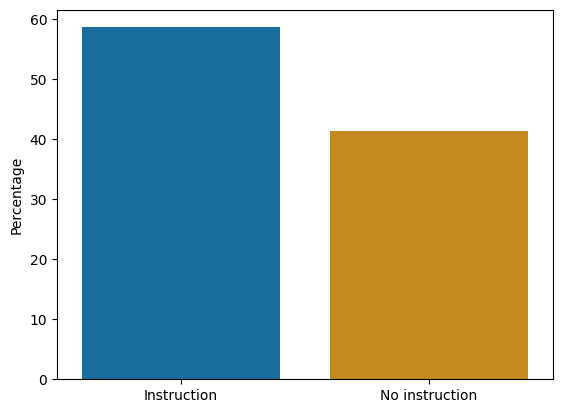

In [15]:
d = {'Percentage': [58.61163188007028, 41.38836811992972], 'Instruction': ["Instruction", "No instruction"]}
df = pd.DataFrame(data=d)
df
sns.barplot(x='Instruction', y='Percentage', data=df, palette="colorblind")
plt.xlabel("")
plt.show()

## Poverty

American Community Survey Public Use Micro Sample, augmented by NYC Opportunity.

### Overview


In [ ]:
# Df
Poverty_df.show()

In [ ]:
# Show the schema
Poverty_df.printSchema()

In [ ]:
# Display summary statistics
Poverty_df.describe().show()

In [ ]:
# Count the number of rows in the DataFrame
row_count = Poverty_df.count()
print("Total number of rows:", row_count)

# Show the number of columns
col_count = len(Poverty_df.columns)
print("Total number of columns:", col_count)

## Plots

<ipython-input-38-62aa475243d4>:24: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




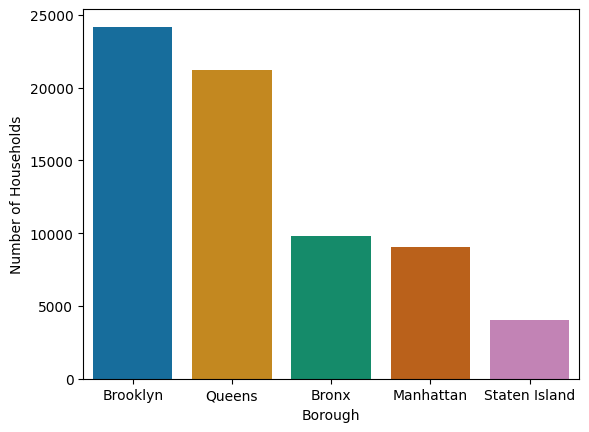

In [38]:
# Group population data by borough and count the number of households in each borough
population_borough = Poverty_df.groupBy("Boro").count()

# Order the data by count in descending order
population_borough = population_borough.orderBy(F.desc("count"))

# Limit the DataFrame to the top rows
population_borough = population_borough.limit(5)

# Convert the grouped data to a pandas DataFrame
population_borough = population_borough.toPandas()

# Replace numerical codes with borough names
population_borough = population_borough.replace({'Boro': 1}, 'Bronx')
population_borough = population_borough.replace({'Boro': 2}, 'Brooklyn')
population_borough = population_borough.replace({'Boro': 3}, 'Manhattan')
population_borough = population_borough.replace({'Boro': 4}, 'Queens')
population_borough = population_borough.replace({'Boro': 5}, 'Staten Island')

# Display the first 5 rows of the DataFrame
population_borough.head(5)

# Create a bar plot to visualize the number of households in each borough
sns.barplot(x='Boro', y='count', data=population_borough, palette="colorblind")
plt.xlabel("Borough")
plt.ylabel("Number of Households")
plt.show()

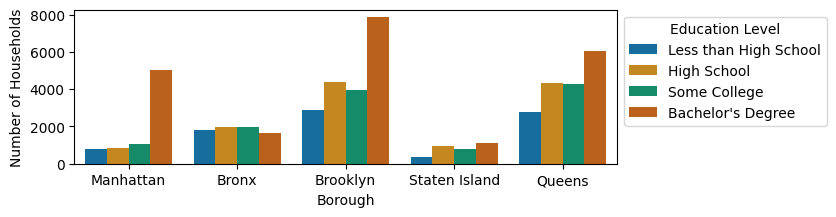

In [35]:
# Group population data by borough and educational attainment level
population_borough = Poverty_df.where(Poverty_df.AgeCateg > 1).groupBy("Boro", "EducAttain").count()

# Sort the data by count in descending order and educational attainment in ascending order
population_borough = population_borough.orderBy(F.desc("count"))
population_borough = population_borough.orderBy(F.asc("EducAttain"))

# Convert the grouped data to a pandas DataFrame
population_borough = population_borough.toPandas()

# Replace numerical codes with borough names and educational attainment labels
population_borough['Boro'] = population_borough['Boro'].replace({1: 'Bronx', 2: 'Brooklyn', 3: 'Manhattan', 4: 'Queens', 5: 'Staten Island'})
population_borough['EducAttain'] = population_borough['EducAttain'].replace({1: 'Less than High School', 2: 'High School', 3: 'Some College', 4: "Bachelor's Degree"})

# Create a bar plot to visualize population data by borough and educational attainment
fig, ax = plt.subplots(figsize=(7, 2))
sns.barplot(x='Boro', y='count', data=population_borough, palette="colorblind", hue='EducAttain', ax=ax)
plt.xlabel("Borough")
plt.ylabel("Number of Households")
ax.legend(bbox_to_anchor=(1, 1), title='Education Level')

plt.show()

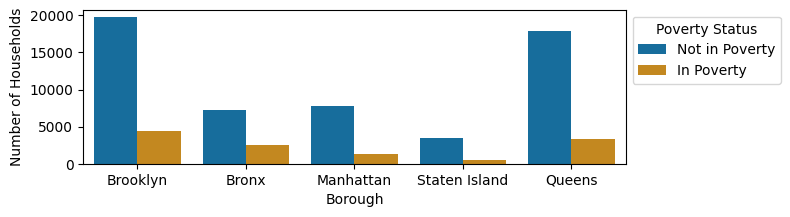

In [36]:
# Group population data by borough and poverty status
population_borough = Poverty_df.groupBy("Boro", "NYCgov_Pov_Stat").count()

# Sort the data by count in descending order and poverty status in descending order
population_borough = population_borough.orderBy(F.desc("count"))
population_borough = population_borough.orderBy(F.desc("NYCgov_Pov_Stat"))

# Convert the grouped data to a pandas DataFrame
population_borough = population_borough.toPandas()

# Replace numerical codes with borough names and poverty status labels
population_borough['Boro'] = population_borough['Boro'].replace({1: 'Bronx', 2: 'Brooklyn', 3: 'Manhattan', 4: 'Queens', 5: 'Staten Island'})
population_borough['NYCgov_Pov_Stat'] = population_borough['NYCgov_Pov_Stat'].replace({1: 'In Poverty', 2: 'Not in Poverty'})

# Display the first 5 rows of the DataFrame
population_borough.head(5)

# Create a bar plot to visualize population data by borough and poverty status
fig, ax = plt.subplots(figsize=(7, 2))
sns.barplot(x='Boro', y='count', data=population_borough, palette="colorblind", hue='NYCgov_Pov_Stat', ax=ax)
plt.xlabel("Borough")
plt.ylabel("Number of Households")
ax.legend(bbox_to_anchor=(1, 1), title='Poverty Status')

plt.show()

<Axes: xlabel='NYCgov_Income', ylabel='EST_Childcare'>

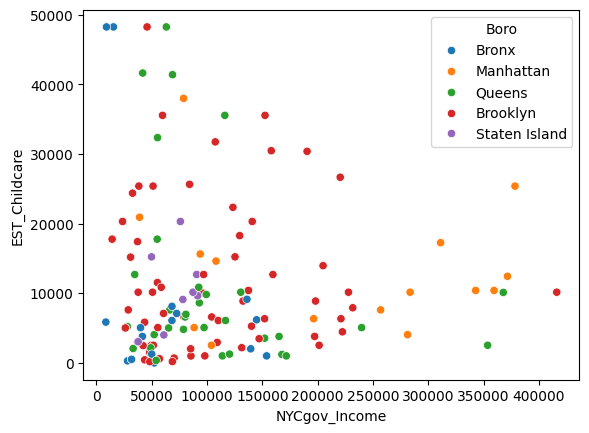

In [37]:
# Select relevant columns from the dataset: borough, childcare establishments, and NYC government income
population_borough = Poverty_df.select("Boro", "EST_Childcare", "NYCgov_Income")

# Convert the selected data to a pandas DataFrame
population_borough = population_borough.toPandas()

# Remove rows where childcare establishments are zero
population_borough = population_borough[population_borough['EST_Childcare'] != 0]

# Sample a fraction of the data (2%) for visualization
population_borough = population_borough.sample(frac=0.02)

# Replace numerical codes with borough names
population_borough = population_borough.replace({'Boro': 1}, 'Bronx')
population_borough = population_borough.replace({'Boro': 2}, 'Brooklyn')
population_borough = population_borough.replace({'Boro': 3}, 'Manhattan')
population_borough = population_borough.replace({'Boro': 4}, 'Queens')
population_borough = population_borough.replace({'Boro': 5}, 'Staten Island')

# Create a scatter plot to visualize the relationship between NYC government income and childcare establishments,
# with each point colored by borough
sns.scatterplot(x="NYCgov_Income",
                y="EST_Childcare",
                hue="Boro",
                data=population_borough)


# **Quality**

## Arrests

In [ ]:
# Count total missing values
total_missing = Arrest_df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in Arrest_df.columns]).show()

## Collisions

In [ ]:
# Omitting CRASH_TIME column from the list of columns
columns_to_check = [c for c in Collisions_df.columns if c != "CRASH_TIME"]

# Count total missing values in the DataFrame excluding CRASH_TIME
total_missing = Collisions_df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in columns_to_check]).show()

## Education

In [ ]:
# Count total missing values
total_missing = Education_df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in Education_df.columns]).show()

## Poverty

In [ ]:
# Count total missing values
total_missing = Poverty_df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in Poverty_df.columns]).show()

## Solutions to manage missing values

1. Drop rows with missing values
2. Impute missing values with mean, median, or mode
3. Impute missing values with a default value
4. Convert missing values to a specific category (for categorical columns)

In [ ]:
"""

# Example

# 1. Drop rows with missing values
df_cleaned = df.dropna()

# 2. Impute missing values with mean, median, or mode
# For numeric columns
numeric_cols = [c for c, t in df.dtypes if t in ['int', 'double']]
for col_name in numeric_cols:
    mean_value = df_cleaned.select(col_name).agg({col_name: "mean"}).collect()[0][0]
    df = df.withColumn(col_name, when(col(col_name).isNull(), mean_value).otherwise(col(col_name)))

# 3. Impute missing values with a default value
# For categorical columns
categorical_cols = [c for c, t in df.dtypes if t == 'string']
for col_name in categorical_cols:
    default_value = "Unknown"
    df = df.fillna({col_name: default_value})

# 4. Convert missing values to a specific category (for categorical columns)
# For example, if you have a categorical column "gender" with missing values, you could convert them to "Other"
df = df.fillna({'gender': 'Other'})

"""

# **Filters, cleaning and transformation**

## Arrest

In [ ]:
# Potentially relevant categories

important_columns = ["ARREST_DATE", "PD_CD", "KY_CD", "OFNS_DESC", "LAW_CAT_CD", "ARREST_BORO", "AGE_GROUP", "ARREST_PRECINCT", "JURISDICTION_CODE", "AGE_GROUP", "PERP_SEX", "PERP_RACE"]
Arrest_df = Arrest_df.select(important_columns)

#Drop null values
Arrest_df = Arrest_df.dropna()

#Transform the date column to date type
Arrest_df = Arrest_df.withColumn("ARREST_DATE", to_date("ARREST_DATE", "MM/dd/yyyy"))

#Data transformation for the age group column
Arrest_df = Arrest_df.withColumn("AGE_GROUP", F.when(F.col("AGE_GROUP") == "65+", "65-100").otherwise(F.col("AGE_GROUP")))

#Show the data
Arrest_df.show()


## Collisions

In [ ]:
important_collumns = ["CRASH_DATE", "STATE_REGISTRATION", "VEHICLE_TYPE", "VEHICLE_MODEL", "VEHICLE_YEAR", "TRAVEL_DIRECTION", "VEHICLE_OCCUPANTS", "DRIVER_SEX", "DRIVER_LICENSE_STATUS", "PRE_CRASH", "POINT_OF_IMPACT", "VEHICLE_DAMAGE", "PUBLIC_PROPERTY_DAMAGE", "CONTRIBUTING_FACTOR_1", "CONTRIBUTING_FACTOR_2"]

Collisions_df = Collisions_df.select(important_collumns)

#Verify null values
Collisions_df.select([F.count(F.when(F.isnull(c), c)).alias(c) for c in Collisions_df.columns]).show()

#Drop null values of driver sex
Collisions_df = Collisions_df.na.drop(subset=["DRIVER_SEX"])

#Drop null values of driver license status
Collisions_df = Collisions_df.na.drop(subset=["DRIVER_LICENSE_STATUS"])

#Drop null values of State Registration
Collisions_df = Collisions_df.na.drop(subset=["STATE_REGISTRATION"])

#Drop null values of Vehicle Type
Collisions_df = Collisions_df.na.drop(subset=["VEHICLE_TYPE"])

#Transform the vehicle null values to unknown
Collisions_df = Collisions_df.na.fill("UNKNOWN", subset=["VEHICLE_MODEL"])

#Transform the vehicle year null values to unknown
Collisions_df = Collisions_df.na.fill("UNKNOWN", subset=["VEHICLE_YEAR"])

#Drop null values of Travel Direction
Collisions_df = Collisions_df.na.drop(subset=["TRAVEL_DIRECTION"])

#Transform the vehicle occupants null values to 1
Collisions_df = Collisions_df.na.fill(1, subset=["VEHICLE_OCCUPANTS"])

#Transform the pre crash null values to unknown
Collisions_df = Collisions_df.na.fill("UNKNOWN", subset=["PRE_CRASH"])

#Drop null values of Point of Impact
Collisions_df = Collisions_df.na.drop(subset=["POINT_OF_IMPACT"])

#Drop null values of Vehicle Damage
Collisions_df = Collisions_df.na.drop(subset=["VEHICLE_DAMAGE"])

#Drop null values of Public Property Damage
Collisions_df = Collisions_df.na.drop(subset=["PUBLIC_PROPERTY_DAMAGE"])

#Transform the contributing factor 1 null values to unknown
Collisions_df = Collisions_df.na.fill("UNKNOWN", subset=["CONTRIBUTING_FACTOR_1"])

#Transform the contributing factor 2 null values to unknown
Collisions_df = Collisions_df.na.fill("UNKNOWN", subset=["CONTRIBUTING_FACTOR_2"])

# Show the data
Collisions_df.show()

## Education

In [ ]:
#Count null values
Education_df.select([F.count(F.when(F.col(c).isNull(), c)).alias(c) for c in Education_df.columns]).show()

# Show the data
Education_df.show()

## Poverty

In [ ]:
# Filter the important columns
important_columns = ["AGEP", "CIT", "REL", "SCHL", "SEX", "ESR", "MSP", "ENG", "WKHP", "WKW", "DIS", "NP", "TEN", "AgeCateg", "Boro", "EST_Childcare", "EST_Housing", "EST_IncomeTax", "EST_PovGap", "Ethnicity", "FTPTWork", "MRGP_adj", "Off_Pov_Stat", "OI_adj", "WAGP_adj", "RETP_adj", "RNTP_adj", "EST_EITC", "CitizenStatus"]

Poverty_df = Poverty_df.select(important_columns)


#Verify if null values are present
Poverty_df.select([F.count(F.when(F.isnull(c), c)).alias(c) for c in Poverty_df.columns]).show()

#Drop the columns that have ESR null values
Poverty_df = Poverty_df.na.drop(subset=["ESR"])

#Transforming the SCHL null values to 0
Poverty_df = Poverty_df.withColumn("SCHL", F.when(F.col("SCHL").isNull(), 0).otherwise(F.col("SCHL")))

#Transforming the WKW null values to the most common value
Poverty_df = Poverty_df.withColumn("WKW", F.when(F.col("WKW").isNull(), 1).otherwise(F.col("WKW")))

#Get the most common value of the ENG column depending on the Ethnicity
ethnicity_eng_lvl = Poverty_df.groupBy("Ethnicity").agg(F.expr("percentile_approx(ENG, 0.5)").alias("ENG_common"))
print(ethnicity_eng_lvl.show())

#Transform the null values of the ENG column to the most common value
Poverty_df = Poverty_df.join(ethnicity_eng_lvl, "Ethnicity")

Poverty_df = Poverty_df.withColumn("ENG", F.coalesce("ENG", "ENG_common"))

# Display the DataFrame with relevant columns
Poverty_df.show()

# **Bonus**

## Average Annual Population of NYC Neighborhood

In [ ]:
# URL of the web page
url = "https://www.health.ny.gov/statistics/cancer/registry/appendix/neighborhoodpop.htm"

# Send a GET request to the URL
response = requests.get(url)

# Parse the HTML content of the page
soup = BeautifulSoup(response.text, 'html.parser')

# Find the table with the specified class
table = soup.find('table', {'class': 'light_table right'})

# Extract the rows from the table
rows = table.find_all('tr')

# Extract data from each row
data = []
for row in rows:
    cols = row.find_all(['th', 'td'])
    cols = [col.text.strip() for col in cols]
    data.append(cols)

# Create a Spark DataFrame from the extracted data
columns = data[0]  # Assuming the first row contains column headers
data = data[1:]    # Remove the first row (headers) from the data

# Convert to list of tuples format to create a Spark DataFrame
data_tuples = [tuple(row) for row in data]

# Create a Spark DataFrame
Population_df = spark.createDataFrame(data_tuples, columns)

# Show the DataFrame
Population_df.show()

In [ ]:
# Define borough ranges
ranges = {
    'Bronx': (0, 9),
    'Kings (Brooklyn)': (10, 27),
    'New York (Manhattan)': (28, 37),
    'Queens': (38, 51),
    'Richmond (Staten Island)': (52, 54)
}

# Create DataFrame with borough column
borough_list = []
for borough, (start, end) in ranges.items():
    borough_list.extend([borough] * (end - start + 1))

df = spark.createDataFrame([(borough,) for borough in borough_list], ["Borough (ALL)"])

# Show DataFrame
df.show()

In [ ]:
# Assuming 'df' is your DataFrame
num_rows = Population_df.count()
print("Number of rows in the DataFrame:", num_rows)
num_rows = df.count()
print("Number of rows in the DataFrame:", num_rows)

In [ ]:
# Create a Spark session
spark = SparkSession.builder.appName("Combine Columns").getOrCreate()

# Add a unique row index to each DataFrame
df = df.withColumn("row_id", monotonically_increasing_id())
Population_df = Population_df.withColumn("row_id", monotonically_increasing_id())

# Combine the columns from both DataFrames based on the row index
Population_df = df.join(Population_df, "row_id").drop("row_id")

# Show the combined DataFrame with columns from both DataFrames
Population_df.show()

In [ ]:
# Show the schema
Population_df.printSchema()

In [ ]:
# Remove commas from the columns
Population_df = Population_df.withColumn('Males', regexp_replace('Males', ',', ''))
Population_df = Population_df.withColumn('Females', regexp_replace('Females', ',', ''))
Population_df = Population_df.withColumn('Total Population', regexp_replace('Total Population', ',', ''))

# Convert columns to integer type
Population_df = Population_df.withColumn('Males', Population_df['Males'].cast('int'))
Population_df = Population_df.withColumn('Females', Population_df['Females'].cast('int'))
Population_df = Population_df.withColumn('Total Population', Population_df['Total Population'].cast('int'))

In [ ]:
# Plot the bar plot showing the total population for each borough
plt.figure(figsize=(10, 6))
plt.bar(Population_df.select('Borough (ALL)').toPandas()['Borough (ALL)'],
        Population_df.select('Total Population').toPandas()['Total Population'],
        color='skyblue')
plt.xlabel('Borough')
plt.ylabel('Total Population')
plt.title('Total Population by Borough')
plt.tight_layout()
plt.show()

In [ ]:
# Plot 2: Pie chart showing the distribution of males and females across all boroughs
plt.figure(figsize=(8, 8))
labels = ['Males', 'Females']
sizes = [Population_df.select('Males').toPandas()['Males'].astype(int).sum(),
         Population_df.select('Females').toPandas()['Females'].astype(int).sum()]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Distribution of Males and Females')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## Weather

In [31]:
%pip install pyowm

In [32]:
from pyowm import OWM
from pyowm.utils import config
from pyowm.utils import timestamps
import pandas as pd
from pyowm.owm import OWM

In [33]:
owm = OWM('f3be3746c4bf6ed6bcb1c925ea13320b')

mgr = owm.weather_manager()


# Function to retrieve weather data for a city
def get_weather(city):
    observation = mgr.weather_at_place(city)
    w = observation.weather
    return {
        'City': city,
        'Detailed Status': w.detailed_status,
        'Wind Speed': w.wind()['speed'],
        'Wind Direction': w.wind()['deg'],
        'Humidity': w.humidity,
        'Temperature': w.temperature('celsius')['temp'],
        'Max Temperature': w.temperature('celsius')['temp_max'],
        'Min Temperature': w.temperature('celsius')['temp_min'],
        'Rain': w.rain,
        'Heat Index': w.heat_index,
        'Clouds': w.clouds
    }

# List of important cities in the United States
important_cities_us = [
    'New York,US', 'Los Angeles,US', 'Chicago,US', 'Houston,US', 'Phoenix,US',
    'Philadelphia,US', 'San Antonio,US', 'San Diego,US', 'Dallas,US', 'San Jose,US',
    'Austin,US', 'Jacksonville,US', 'San Francisco,US', 'Columbus,US', 'Fort Worth,US',
    'Indianapolis,US', 'Charlotte,US', 'Seattle,US', 'Denver,US', 'Washington,US',
    'Boston,US', 'El Paso,US', 'Nashville,US', 'Detroit,US', 'Oklahoma City,US',
    'Portland,US', 'Las Vegas,US', 'Memphis,US', 'Louisville,US', 'Milwaukee,US'
]

# Retrieve weather data for each city
weather_data = [get_weather(city) for city in important_cities_us]

# Create DataFrame from the weather data
df_weather = pd.DataFrame(weather_data)
# Display the DataFrame
df_weather.head()

,City,Detailed Status,Wind Speed,Wind Direction,Humidity,Temperature,Max Temperature,Min Temperature,Rain,Heat Index,Clouds
0,"New York,US",clear sky,13.38,320,22,10.85,11.98,8.97,{},None,0
1,"Los Angeles,US",clear sky,7.72,240,59,17.71,21.01,14.69,{},None,0
2,"Chicago,US",few clouds,4.02,195,35,19.37,19.74,18.63,{},None,18
3,"Houston,US",few clouds,5.14,0,53,22.17,24.47,19.95,{},None,20
4,"Phoenix,US",clear sky,2.24,255,22,26.45,27.84,25.00,{},None,1


In [34]:
# Create a custom color scale for temperature
color_scale = [(1, 'rgb(255,0,0)'),  # Blue
               (0, 'rgb(0,0,255)')]  # Red

# Create a bar chart with custom color scale for maximum temperature
fig = px.bar(df_weather.sort_values('Max Temperature', ascending=False),
             x='City',
             y='Max Temperature',
             title='Maximum Temperature in Important US Cities',
             labels={'City': 'City', 'Max Temperature': 'Max Temperature (°C)'},
             color='Max Temperature',
             color_continuous_scale=color_scale
            )
fig.update_xaxes(tickangle=45)
fig.show()

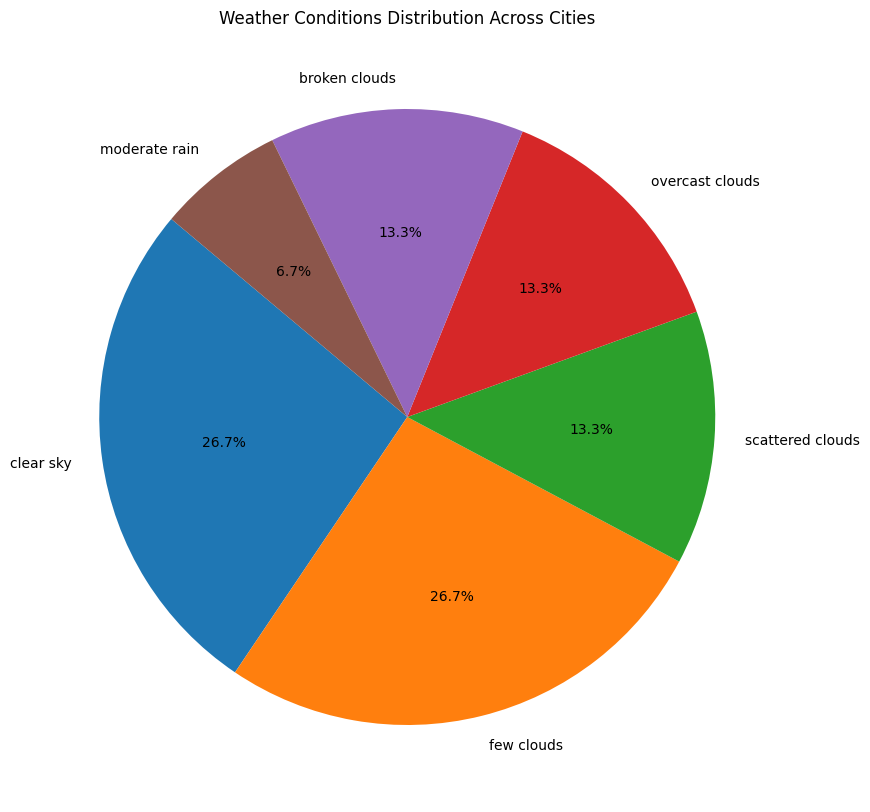

In [23]:
# Pie chart for weather conditions distribution across all cities
weather_conditions_counts = df_weather['Detailed Status'].value_counts()
plt.figure(figsize=(10, 10))
plt.pie(weather_conditions_counts, labels=weather_conditions_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Weather Conditions Distribution Across Cities')
plt.show()